In [1]:
import numpy as np
import cv2
import IPython
import handshape_datasets as hd
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# if input image is in range 0..1, please first multiply img by 255
# assume image is ndarray of shape [height, width, channels] where channels can be 1, 3 or 4
def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

In [3]:

DATASET_NAME = "rwth"

data = hd.load(DATASET_NAME)

Reading images


In [4]:
data

(array([[[[158, 166, 173],
          [158, 166, 173],
          [158, 166, 173],
          ...,
          [ 41,  22,   8],
          [ 62,  43,  29],
          [ 52,  39,  32]],
 
         [[157, 165, 172],
          [157, 165, 172],
          [157, 165, 172],
          ...,
          [ 40,  21,   7],
          [ 61,  42,  28],
          [ 47,  34,  27]],
 
         [[156, 164, 171],
          [156, 164, 171],
          [156, 164, 171],
          ...,
          [ 45,  25,  16],
          [ 54,  34,  25],
          [ 49,  33,  29]],
 
         ...,
 
         [[184, 193, 204],
          [184, 193, 204],
          [184, 193, 204],
          ...,
          [ 43,  38,  26],
          [ 43,  38,  26],
          [ 40,  37,  24]],
 
         [[184, 194, 202],
          [184, 194, 202],
          [184, 194, 202],
          ...,
          [ 40,  37,  24],
          [ 41,  38,  25],
          [ 35,  32,  19]],
 
         [[185, 195, 203],
          [185, 195, 203],
          [185, 195, 203],
   

In [5]:
data[0].shape

(3359, 132, 92, 3)

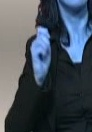

In [6]:
imshow(data[0][0])

In [7]:
data[1]['y']

array([43, 43,  8, ..., 24, 24, 24])

In [8]:
np.unique(data[1]['y'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [9]:
n_unique = len(np.unique(data[1]['y']))
n_unique

45

In [10]:
np.equal(43,data[1]['y'])

array([ True,  True, False, ..., False, False, False])

class: 0,size: 529


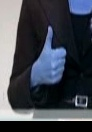

class: 1,size: 321


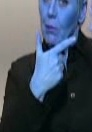

class: 2,size: 152


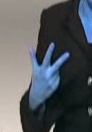

class: 3,size: 8


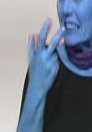

class: 4,size: 21


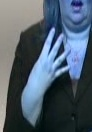

class: 5,size: 349


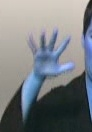

class: 6,size: 46


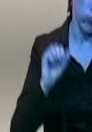

class: 7,size: 36


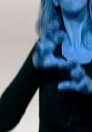

class: 8,size: 197


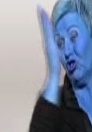

class: 9,size: 30


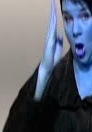

class: 10,size: 113


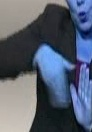

class: 11,size: 7


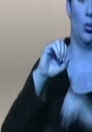

class: 12,size: 29


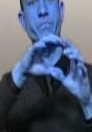

class: 13,size: 15


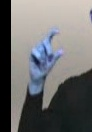

class: 14,size: 9


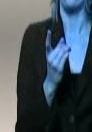

class: 15,size: 18


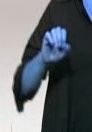

class: 16,size: 333


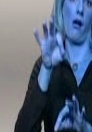

class: 17,size: 5


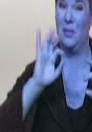

class: 18,size: 11


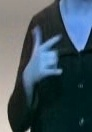

class: 19,size: 5


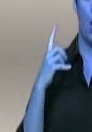

class: 20,size: 12


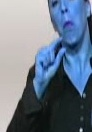

class: 21,size: 37


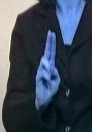

class: 22,size: 1


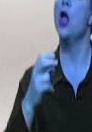

class: 23,size: 6


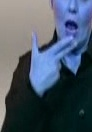

class: 24,size: 7


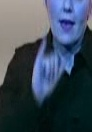

class: 25,size: 401


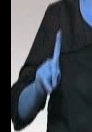

class: 26,size: 15


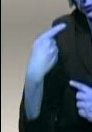

class: 27,size: 24


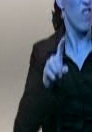

class: 28,size: 309


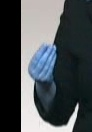

class: 29,size: 7


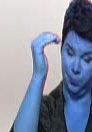

class: 30,size: 2


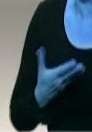

class: 31,size: 14


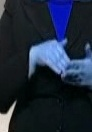

class: 32,size: 5


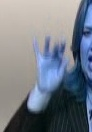

class: 33,size: 7


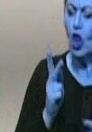

class: 34,size: 23


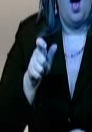

class: 35,size: 13


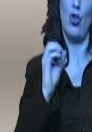

class: 36,size: 6


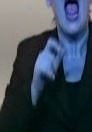

class: 37,size: 88


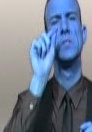

class: 38,size: 2


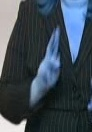

class: 39,size: 103


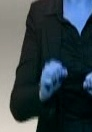

class: 40,size: 24


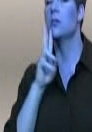

class: 41,size: 5


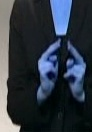

class: 42,size: 4


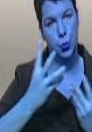

class: 43,size: 9


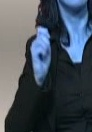

class: 44,size: 1


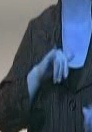

In [11]:
good_min = 20
good_classes = []
for i in range(n_unique):
    images = data[0][np.equal(i,data[1]['y'])]
    print("class: " + str(i) + ",size: " + str(len(images)))
    imshow(images[0])
    if len(images) >= good_min:
        good_classes = good_classes + [i]

In [12]:
good_classes

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 16, 21, 25, 27, 28, 34, 37, 39, 40]

In [13]:
len(good_classes)

20

In [14]:
good_x = data[0][np.in1d(data[1]['y'], good_classes)]

In [15]:
good_y = data[1]['y'][np.in1d(data[1]['y'], good_classes)]

In [16]:
good_x

array([[[[221, 222, 225],
         [221, 222, 225],
         [221, 222, 225],
         ...,
         [158, 129, 107],
         [151, 122, 100],
         [149, 130, 116]],

        [[221, 222, 225],
         [221, 222, 225],
         [221, 222, 225],
         ...,
         [162, 133, 111],
         [151, 122, 100],
         [144, 125, 111]],

        [[221, 222, 225],
         [221, 222, 225],
         [221, 222, 225],
         ...,
         [170, 137, 112],
         [158, 125, 100],
         [148, 126, 108]],

        ...,

        [[192, 195, 204],
         [192, 195, 204],
         [192, 195, 204],
         ...,
         [ 44,  37,  35],
         [ 49,  42,  40],
         [ 54,  39,  30]],

        [[193, 196, 203],
         [193, 196, 203],
         [193, 196, 203],
         ...,
         [ 44,  39,  36],
         [ 48,  43,  40],
         [ 52,  46,  39]],

        [[195, 198, 205],
         [195, 198, 205],
         [195, 198, 205],
         ...,
         [ 44,  39,  36],
        

In [17]:
good_y

array([8, 8, 8, ..., 5, 5, 5])

In [18]:
my_dict = dict(zip(np.unique(good_y), range(len(np.unique(good_y)))))
my_dict

{0: 0,
 1: 1,
 2: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 12: 10,
 16: 11,
 21: 12,
 25: 13,
 27: 14,
 28: 15,
 34: 16,
 37: 17,
 39: 18,
 40: 19}

In [19]:
np.vectorize(my_dict.get)(good_y)

array([7, 7, 7, ..., 4, 4, 4])

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
rotation_range=10
width_shift_range=0.10
height_shift_range=0.10
horizontal_flip=True
batch_size = 16


features = good_x
labels = good_y
n_classes = len(np.unique(labels))
image_shape = np.shape(features)[1:]

x_train, x_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    test_size=0.25,
                                                    random_state=42)
x_train, x_test = x_train / 255.0, x_test / 255.0

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    horizontal_flip=horizontal_flip)
datagen.fit(x_train)

train_gen =  datagen.flow(x_train, y_train, batch_size=batch_size)

batches = 0
for images, labels in train_gen:
    print(images)
    print(labels)
    batches += 1
    if batches >= len(x_train) / batch_size:
        # we need to break the loop by hand because
        # the generator loops indefinitely
        break

396
247
106
18
261
32
28
135
23
81
23
250
28
308
19
225
19
70
83
21
133
74
46
3
88
14
8
62
7
32
6
83
9
93
5
84
4
18
20
3
[[[[-1.3796084e-03 -3.6999559e-01 -6.5252334e-01]
   [-4.8162278e-02 -4.3206832e-01 -7.2165346e-01]
   [ 2.8327517e-02 -3.9866132e-01 -7.3705971e-01]
   ...
   [ 6.5650713e-01  1.0461758e+00  1.2151097e+00]
   [ 6.5650713e-01  1.0461758e+00  1.2151097e+00]
   [ 6.5650713e-01  1.0461758e+00  1.2151097e+00]]

  [[ 2.2632652e-03 -3.6603573e-01 -6.4878827e-01]
   [-5.1076621e-02 -4.3206832e-01 -7.1866530e-01]
   [ 1.9584706e-02 -4.0816516e-01 -7.4602401e-01]
   ...
   [ 6.5650713e-01  1.0461758e+00  1.2151097e+00]
   [ 6.5650713e-01  1.0461758e+00  1.2151097e+00]
   [ 6.5650713e-01  1.0461758e+00  1.2151097e+00]]

  [[ 5.9061386e-03 -3.6207578e-01 -6.4505309e-01]
   [-5.3990856e-02 -4.3206832e-01 -7.1567720e-01]
   [ 1.0841896e-02 -4.1766900e-01 -7.5498825e-01]
   ...
   [ 6.5650713e-01  1.0461758e+00  1.2151097e+00]
   [ 6.5650713e-01  1.0461758e+00  1.2151097e+00]
   [

[[[[ 0.8386994   1.2898614   1.4597293 ]
   [ 0.83875924  1.29001     1.4594761 ]
   [ 0.83875924  1.29001     1.4594761 ]
   ...
   [ 0.7546429   1.2290515   1.3588547 ]
   [ 0.7546429   1.2290515   1.3588547 ]
   [ 0.7546429   1.2290515   1.3588547 ]]

  [[ 0.82752955  1.2760928   1.4544139 ]
   [ 0.82638574  1.2765595   1.4467891 ]
   [ 0.82488924  1.2749327   1.4452547 ]
   ...
   [ 0.7546429   1.2206458   1.3548905 ]
   [ 0.7546429   1.2173926   1.3533561 ]
   [ 0.7546429   1.2141391   1.3518218 ]]

  [[ 0.8078739   1.2530994   1.4403977 ]
   [ 0.800153    1.2480435   1.419892  ]
   [ 0.7971601   1.24479     1.4168231 ]
   ...
   [ 0.7508568   1.1944566   1.3405982 ]
   [ 0.7493603   1.1928298   1.3390638 ]
   [ 0.7478639   1.1912031   1.3375294 ]]

  ...

  [[-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   ...
   [-1.0818981  -0.9197365  -0.82606816]
   [-1.0918632  -0.93056893 -0.83628565]
   [-1.0959175  

[[[[ 1.68035293e+00  2.11818576e+00  2.20694947e+00]
   [ 1.75001991e+00  2.14342928e+00  2.20694947e+00]
   [ 1.75863469e+00  2.11767650e+00  2.16278481e+00]
   ...
   [ 1.62384534e+00  2.03675175e+00  2.07757926e+00]
   [ 1.62384534e+00  2.03675175e+00  2.07757926e+00]
   [ 1.62384534e+00  2.03675175e+00  2.07757926e+00]]

  [[ 1.66904426e+00  2.11408806e+00  2.20694947e+00]
   [ 1.75001991e+00  2.14342928e+00  2.20694947e+00]
   [ 1.75109565e+00  2.14021397e+00  2.20143557e+00]
   ...
   [ 1.62384534e+00  2.03675175e+00  2.07757926e+00]
   [ 1.62384534e+00  2.03675175e+00  2.07757926e+00]
   [ 1.62384534e+00  2.03675175e+00  2.07757926e+00]]

  [[ 1.66181946e+00  2.10851026e+00  2.20276189e+00]
   [ 1.74402440e+00  2.14338470e+00  2.20996022e+00]
   [ 1.75061595e+00  2.14407706e+00  2.20756078e+00]
   ...
   [ 1.62293088e+00  2.03575754e+00  2.07664156e+00]
   [ 1.62104595e+00  2.03370857e+00  2.07470870e+00]
   [ 1.61916113e+00  2.03165984e+00  2.07277632e+00]]

  ...

  [[ 1.76329

[[[[ 1.1051278e+00  5.4326802e-01  2.9514220e-01]
   [ 1.1051278e+00  5.4326802e-01  2.9514220e-01]
   [ 1.1051278e+00  5.4326802e-01  2.9514220e-01]
   ...
   [ 1.1331666e+00  1.5643233e+00  1.7038424e+00]
   [ 1.1331666e+00  1.5643233e+00  1.7038424e+00]
   [ 1.1331666e+00  1.5643233e+00  1.7038424e+00]]

  [[ 1.1051278e+00  5.4326802e-01  2.9514220e-01]
   [ 1.1051278e+00  5.4326802e-01  2.9514220e-01]
   [ 1.1051278e+00  5.4326802e-01  2.9514220e-01]
   ...
   [ 1.1331666e+00  1.5643233e+00  1.7038424e+00]
   [ 1.1331666e+00  1.5643233e+00  1.7038424e+00]
   [ 1.1331666e+00  1.5643233e+00  1.7038424e+00]]

  [[ 1.1634451e+00  6.0666120e-01  3.5493651e-01]
   [ 1.1562786e+00  5.9887111e-01  3.4758878e-01]
   [ 1.1491125e+00  5.9108120e-01  3.4024096e-01]
   ...
   [ 1.1331666e+00  1.5643233e+00  1.7038424e+00]
   [ 1.1331666e+00  1.5643233e+00  1.7038424e+00]
   [ 1.1331666e+00  1.5643233e+00  1.7038424e+00]]

  ...

  [[-1.1496958e+00 -9.9597299e-01 -9.0755183e-01]
   [-1.1200510e+

[[[[-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   ...
   [ 1.2277371   0.96641785  0.8667641 ]
   [ 1.0792707   0.71327573  0.6279925 ]
   [ 0.8261867   0.54962766  0.5577439 ]]

  [[-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   ...
   [ 1.2370492   0.92795175  0.8304817 ]
   [ 1.0494719   0.68088317  0.5974389 ]
   [ 0.7908006   0.5314068   0.5558343 ]]

  [[-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   ...
   [ 1.2419953   0.8901636   0.7948388 ]
   [ 1.019422    0.6491272   0.5681718 ]
   [ 0.7554145   0.5131861   0.5539247 ]]

  ...

  [[-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   ...
   [-1.0398399  -0.87401766 -1.1423069 ]
   [-1.0398399  -0.87401766 -1.1423069 ]
   [-1.0398399  

[[[[ 0.9619063   0.2468954  -0.01685588]
   [ 1.053774   -0.01546327 -0.30374297]
   [ 0.9898829  -0.07575944 -0.36733326]
   ...
   [ 1.2345401   1.6440411   1.7646602 ]
   [ 1.2326086   1.6419413   1.7626797 ]
   [ 1.2325529   1.6398418   1.7613404 ]]

  [[ 0.57905495 -0.20353277 -0.35216376]
   [ 0.67610675 -0.4342669  -0.5607879 ]
   [ 0.5383539  -0.61109656 -0.6988393 ]
   ...
   [ 1.2525983   1.6289467   1.7613404 ]
   [ 1.2564613   1.6268471   1.7613404 ]
   [ 1.2593411   1.6252818   1.7613404 ]]

  [[ 0.35059035 -0.5207776  -0.5647537 ]
   [ 0.49153095 -0.61163116 -0.6504496 ]
   [ 0.39253625 -0.77997357 -0.80923533]
   ...
   [ 1.2593411   1.6252818   1.7613404 ]
   [ 1.2593411   1.6252818   1.7613404 ]
   [ 1.2589834   1.624893    1.7609736 ]]

  ...

  [[-1.2781696  -1.1483309  -1.0991836 ]
   [-1.2781696  -1.1483309  -1.0991836 ]
   [-1.2781696  -1.1483309  -1.0991836 ]
   ...
   [ 1.4035336   1.8184938   1.8650367 ]
   [ 1.3562099   1.7915405   1.8319137 ]
   [ 1.3902237  

[[[[-0.87160707 -0.7216213  -0.5529528 ]
   [-0.87160707 -0.7216213  -0.5529528 ]
   [-0.87160707 -0.7216213  -0.5529528 ]
   ...
   [-0.7906163  -0.68434453 -0.48914322]
   [-0.7922005  -0.6870878  -0.4888412 ]
   [-0.7806565  -0.6811833  -0.4506203 ]]

  [[-0.87160707 -0.7216213  -0.5529528 ]
   [-0.87160707 -0.7216213  -0.5529528 ]
   [-0.87160707 -0.7216213  -0.5529528 ]
   ...
   [-0.7912229  -0.6799594  -0.49928153]
   [-0.80651677 -0.69658446 -0.5149628 ]
   [-0.77750033 -0.6756789  -0.44508103]]

  [[-0.87160707 -0.7216213  -0.5529528 ]
   [-0.87160707 -0.7216213  -0.5529528 ]
   [-0.87160707 -0.7216213  -0.5529528 ]
   ...
   [-0.79554397 -0.6846566  -0.5037121 ]
   [-0.81989    -0.71112174 -0.5286748 ]
   [-0.7709113  -0.66781837 -0.45306373]]

  ...

  [[-0.07250152  0.14703766  0.2663932 ]
   [-0.07250152  0.14703766  0.2663932 ]
   [-0.07250152  0.14703766  0.2663932 ]
   ...
   [ 1.2475891   1.7826074   1.9458839 ]
   [ 1.2335844   1.7649193   1.9361742 ]
   [ 1.2547476  

[[[[-0.5071028  -0.61494386 -0.46670586]
   [-0.5071028  -0.61494386 -0.46670586]
   [-0.5071028  -0.61494386 -0.46670586]
   ...
   [ 1.2733605   1.7776781   1.9482087 ]
   [ 1.2733605   1.7776781   1.9482087 ]
   [ 1.2733605   1.7776781   1.9482087 ]]

  [[-0.5071028  -0.61494386 -0.46670586]
   [-0.5071028  -0.61494386 -0.46670586]
   [-0.5071028  -0.61494386 -0.46670586]
   ...
   [ 1.2733605   1.7776781   1.9482087 ]
   [ 1.2733605   1.7776781   1.9482087 ]
   [ 1.2733605   1.7776781   1.9482087 ]]

  [[-0.5071028  -0.61494386 -0.46670586]
   [-0.5071028  -0.61494386 -0.46670586]
   [-0.5071028  -0.61494386 -0.46670586]
   ...
   [ 1.2733605   1.7776781   1.9482087 ]
   [ 1.2733605   1.7776781   1.9482087 ]
   [ 1.2733605   1.7776781   1.9482087 ]]

  ...

  [[-1.0258205  -0.87401766 -0.84044266]
   [-1.0258205  -0.87401766 -0.84044266]
   [-1.0258205  -0.87401766 -0.84044266]
   ...
   [ 0.57482314  0.9573822   1.1026077 ]
   [ 0.57239074  0.95473814  1.1001137 ]
   [ 0.57239074 

[[[[ 0.544352    0.00988099 -0.09296905]
   [ 0.5477988   0.0108177  -0.09532503]
   [ 0.71416557  0.05731845 -0.20634395]
   ...
   [ 0.7546429   1.1985722   1.3444802 ]
   [ 0.7546429   1.1985722   1.3444802 ]
   [ 0.7546429   1.1985722   1.3444802 ]]

  [[ 0.5395429   0.01929072 -0.07127316]
   [ 0.544352    0.00988099 -0.09296905]
   [ 0.6995698   0.052063   -0.19906867]
   ...
   [ 0.7546429   1.1985722   1.3444802 ]
   [ 0.7546429   1.1985722   1.3444802 ]
   [ 0.7546429   1.1985722   1.3444802 ]]

  [[ 0.5329908   0.03211109 -0.04171362]
   [ 0.544352    0.00988099 -0.09296905]
   [ 0.6838447   0.04778954 -0.18831964]
   ...
   [ 0.74418926  1.1872087   1.3337617 ]
   [ 0.742879    1.1857843   1.3324183 ]
   [ 0.7415685   1.1843598   1.3310746 ]]

  ...

  [[-0.9557235  -0.8435383  -0.82606816]
   [-0.9557235  -0.8435383  -0.82606816]
   [-0.9565303  -0.84441525 -0.82689536]
   ...
   [-1.0306796  -0.94025826 -0.9514981 ]
   [-1.0741321  -0.8988668  -0.90457666]
   [-1.1376654  

[[[[ 0.51138693  0.9341434   1.0663137 ]
   [ 0.5127717   0.9356488   1.0677336 ]
   [ 0.5166978   0.93991655  1.0717592 ]
   ...
   [ 0.5684666   0.9961913   1.1535882 ]
   [ 0.5689987   0.9971188   1.1542983 ]
   [ 0.56731236  1.000457    1.1550083 ]]

  [[ 0.50229377  0.9242589   1.0569903 ]
   [ 0.50229377  0.9242589   1.0569903 ]
   [ 0.5047502   0.9269291   1.0595089 ]
   ...
   [ 0.55837137  0.9852174   1.1432372 ]
   [ 0.5569825   0.9867271   1.1432372 ]
   [ 0.544352    1.000457    1.1432372 ]]

  [[ 0.49285525  0.9139988   1.0473127 ]
   [ 0.49354756  0.91475135  1.0480226 ]
   [ 0.49630082  0.9177443   1.0508455 ]
   ...
   [ 0.5544815   0.980989    1.1392488 ]
   [ 0.55309266  0.9840043   1.139959  ]
   [ 0.541847    0.99773395  1.1406689 ]]

  ...

  [[-1.1866096  -1.0183223  -0.9909299 ]
   [-1.1874603  -1.0192472  -0.99180216]
   [-1.2014626  -1.0344683  -1.0061592 ]
   ...
   [-0.71739376 -0.73686093 -0.58170176]
   [-0.71739376 -0.73686093 -0.58170176]
   [-0.71739376 

[[[[ 1.4533738   0.8151477   0.23534878]
   [ 1.4531939   0.8149522   0.23516427]
   [ 1.4530139   0.8147565   0.23497976]
   ...
   [ 0.43219683  0.8023418   0.95636886]
   [ 0.43219683  0.8023418   0.95636886]
   [ 0.40961254  0.8023418   0.9486502 ]]

  [[ 1.5557737   0.8913456   0.28514007]
   [ 1.5554858   0.8911501   0.28502938]
   [ 1.5551978   0.89095443  0.28491864]
   ...
   [ 0.43219683  0.8023418   0.95636886]
   [ 0.43219683  0.8023418   0.95636886]
   [ 0.4095045   0.8023418   0.9486133 ]]

  [[ 1.6140902   0.9441339   0.32826343]
   [ 1.6139822   0.94401646  0.32815266]
   [ 1.6138742   0.943899    0.328042  ]
   ...
   [ 0.43219683  0.8023418   0.95636886]
   [ 0.43219683  0.8023418   0.95636886]
   [ 0.40939647  0.8023418   0.94857633]]

  ...

  [[-0.4650446  -0.23395309 -0.22233947]
   [-0.4650446  -0.23395309 -0.22233947]
   [-0.4650446  -0.23395309 -0.22233947]
   ...
   [ 1.5537484   2.0977104   2.2069495 ]
   [ 1.5537484   2.0977104   2.2069495 ]
   [ 1.5537484  

[[[[-0.9276847  -0.7216213  -0.63919973]
   [-0.9276847  -0.7216213  -0.63919973]
   [-0.9276847  -0.7216213  -0.63919973]
   ...
   [ 0.41817743  0.8633003   0.9958206 ]
   [ 0.41817743  0.8633003   1.0138669 ]
   [ 0.4081851   0.8633003   1.0241122 ]]

  [[-0.9276847  -0.7216213  -0.63919973]
   [-0.9276847  -0.7216213  -0.63919973]
   [-0.9276847  -0.7216213  -0.63919973]
   ...
   [ 0.41817743  0.8633003   0.9994397 ]
   [ 0.41817743  0.8633003   1.0138669 ]
   [ 0.40465537  0.8633003   1.0277314 ]]

  [[-0.9276847  -0.7216213  -0.63919973]
   [-0.9276847  -0.7216213  -0.63919973]
   [-0.9276847  -0.7216213  -0.63919973]
   ...
   [ 0.41817743  0.8633003   1.0030588 ]
   [ 0.41817743  0.8633003   1.0138669 ]
   [ 0.40112585  0.8633003   1.0313504 ]]

  ...

  [[-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   ...
   [ 1.6609796   2.1990352   2.2162755 ]
   [ 1.6680391   2.2067091   2.2235136 ]
   [ 1.6750985  

[[[[ 1.1191472   1.5643233   1.6319699 ]
   [ 1.1191472   1.5643233   1.6319699 ]
   [ 1.1191472   1.5643233   1.6319699 ]
   ...
   [ 0.03965364 -0.46254757 -0.35170993]
   [ 0.03965364 -0.46254757 -0.35170993]
   [ 0.03965364 -0.46254757 -0.35170993]]

  [[ 1.1191472   1.5643233   1.6319699 ]
   [ 1.1191472   1.5643233   1.6319699 ]
   [ 1.1191472   1.5643233   1.6319699 ]
   ...
   [ 0.03965364 -0.46254757 -0.35170993]
   [ 0.03965364 -0.46254757 -0.35170993]
   [ 0.03965364 -0.46254757 -0.35170993]]

  [[ 1.1191472   1.5643233   1.6319699 ]
   [ 1.1191472   1.5643233   1.6319699 ]
   [ 1.1191472   1.5643233   1.6319699 ]
   ...
   [ 0.03965364 -0.46254757 -0.35170993]
   [ 0.03965364 -0.46254757 -0.35170993]
   [ 0.03965364 -0.46254757 -0.35170993]]

  ...

  [[ 1.7640394   2.2805858   2.2356985 ]
   [ 1.7640394   2.2805858   2.2356985 ]
   [ 1.7640394   2.2805858   2.2356985 ]
   ...
   [-1.0398399  -0.8435383  -0.75197935]
   [-1.0398399  -0.8435383  -0.75035036]
   [-1.0398399  

[[[[-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   ...
   [ 0.65650713  1.0918947   1.2438587 ]
   [ 0.65650713  1.0918947   1.2438587 ]
   [ 0.65650713  1.0918947   1.2438587 ]]

  [[-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   ...
   [ 0.6436241   1.0778904   1.2306494 ]
   [ 0.64602304  1.0804981   1.233109  ]
   [ 0.6484217   1.0831056   1.2355684 ]]

  [[-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   ...
   [ 0.6298114   1.0628755   1.2164868 ]
   [ 0.6322103   1.0654832   1.2189465 ]
   [ 0.6346092   1.0680909   1.2214061 ]]

  ...

  [[-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   ...
   [-1.207635   -1.0411779  -1.1423069 ]
   [-1.2080727  -1.0416535  -1.1423069 ]
   [-1.2080727  

[[[[ 1.6659036e+00  2.0977104e+00  2.0919538e+00]
   [ 1.6659036e+00  2.0977104e+00  2.0919538e+00]
   [ 1.6653502e+00  2.0971088e+00  2.0913863e+00]
   ...
   [ 7.9877973e-01  6.5067542e-01  1.6213135e-01]
   [ 7.6225001e-01  5.4038280e-01  4.2553131e-02]
   [ 4.9923605e-01  2.3515153e-01 -2.5231045e-01]]

  [[ 1.6529856e+00  2.0836680e+00  2.0787084e+00]
   [ 1.6521702e+00  2.0827816e+00  2.0778723e+00]
   [ 1.6518842e+00  2.0824707e+00  2.0775793e+00]
   ...
   [ 7.8903222e-01  6.2636954e-01  1.0041071e-01]
   [ 7.0804965e-01  4.8311394e-01 -5.5548131e-02]
   [ 4.1152710e-01  1.3980860e-01 -3.8727757e-01]]

  [[ 1.6518842e+00  2.0824707e+00  2.0775793e+00]
   [ 1.6518842e+00  2.0824707e+00  2.0775793e+00]
   [ 1.6518842e+00  2.0824707e+00  2.0775793e+00]
   ...
   [ 7.0419306e-01  5.2823323e-01  8.7424990e-04]
   [ 5.4390490e-01  3.0438480e-01 -2.2915053e-01]
   [ 2.3960865e-01 -5.0324734e-02 -5.7275051e-01]]

  ...

  [[ 1.3154187e+00  1.7471988e+00  1.7900894e+00]
   [ 1.3154187e+

[[[[ 9.08856273e-01  1.36620808e+00  1.50259948e+00]
   [ 9.10789788e-01  1.36830997e+00  1.50458205e+00]
   [ 9.36873913e-01  1.39666438e+00  1.53132689e+00]
   ...
   [-6.07979774e-01 -5.84013462e-01 -3.92789751e-01]
   [ 3.87918741e-01  5.38755655e-01  6.87400877e-01]
   [ 1.16376364e+00  1.48534417e+00  1.63196993e+00]]

  [[ 9.08011377e-01  1.36528969e+00  1.50173330e+00]
   [ 9.09128964e-01  1.36650455e+00  1.50657439e+00]
   [ 9.13760602e-01  1.37153935e+00  1.53059912e+00]
   ...
   [-3.95291090e-01 -3.86722833e-01 -2.22691759e-01]
   [ 7.12097168e-01  8.74315739e-01  1.00456834e+00]
   [ 1.17278659e+00  1.47023523e+00  1.62947011e+00]]

  [[ 8.94112170e-01  1.35018075e+00  1.48748195e+00]
   [ 8.95943403e-01  1.35217130e+00  1.49708951e+00]
   [ 8.97774637e-01  1.35416198e+00  1.51998627e+00]
   ...
   [-1.06763937e-01 -1.18588977e-01  1.79566983e-02]
   [ 8.99333358e-01  1.07760203e+00  1.20094872e+00]
   [ 1.16468740e+00  1.45639157e+00  1.61165893e+00]]

  ...

  [[-1.13985

[[[[ 1.0210114e+00  1.5186044e+00  1.6607189e+00]
   [ 1.0210114e+00  1.5186044e+00  1.6607189e+00]
   [ 1.0210114e+00  1.5186044e+00  1.6607189e+00]
   ...
   [ 1.3354880e+00  5.9556347e-01  2.1509847e-01]
   [ 1.5404124e+00  7.3171878e-01  2.9684481e-01]
   [ 1.8572237e+00  1.0560331e+00  5.9192967e-01]]

  [[ 1.0210114e+00  1.5186044e+00  1.6607189e+00]
   [ 1.0210114e+00  1.5186044e+00  1.6607189e+00]
   [ 1.0210114e+00  1.5186044e+00  1.6607189e+00]
   ...
   [ 1.3268892e+00  5.8621615e-01  2.0628180e-01]
   [ 1.5543028e+00  7.4178493e-01  3.0362689e-01]
   [ 1.8724370e+00  1.0725706e+00  6.0752833e-01]]

  [[ 1.0210114e+00  1.5186044e+00  1.6607189e+00]
   [ 1.0210114e+00  1.5186044e+00  1.6607189e+00]
   [ 1.0210114e+00  1.5186044e+00  1.6607189e+00]
   ...
   [ 1.3182905e+00  5.7686883e-01  1.9746512e-01]
   [ 1.5681931e+00  7.5185138e-01  3.1040886e-01]
   [ 1.8876503e+00  1.0891080e+00  6.2312704e-01]]

  ...

  [[ 7.5464290e-01  1.1985722e+00  1.3732291e+00]
   [ 7.5464290e-

[[[[ 1.0414666e+00  1.5103607e+00  1.6385688e+00]
   [ 1.0431478e+00  1.5121882e+00  1.6402925e+00]
   [ 1.0448290e+00  1.5140158e+00  1.6420163e+00]
   ...
   [-7.7814865e-01 -7.9569787e-01 -6.3870329e-01]
   [-8.4370899e-01 -8.6650002e-01 -7.0398140e-01]
   [-7.8236639e-01 -7.9399949e-01 -6.3661706e-01]]

  [[ 1.0200659e+00  1.4870974e+00  1.6166260e+00]
   [ 1.0234284e+00  1.4907526e+00  1.6200737e+00]
   [ 1.0267906e+00  1.4944074e+00  1.6235211e+00]
   ...
   [-7.5909859e-01 -7.8219569e-01 -6.2446296e-01]
   [-8.1334978e-01 -8.4116888e-01 -6.8008828e-01]
   [-7.7288675e-01 -7.9718393e-01 -6.3860035e-01]]

  [[ 1.0069920e+00  1.4728855e+00  1.6032209e+00]
   [ 1.0069920e+00  1.4728855e+00  1.6032209e+00]
   [ 1.0069920e+00  1.4728855e+00  1.6032209e+00]
   ...
   [-7.5143927e-01 -8.4330040e-01 -7.1345317e-01]
   [-8.2392520e-01 -9.3095577e-01 -7.8587705e-01]
   [-8.0710578e-01 -8.8778478e-01 -7.3790652e-01]]

  ...

  [[-9.2768472e-01 -1.0111743e+00 -8.2606816e-01]
   [-9.2334026e-

[[[[ 0.95975333  0.49191773 -0.0120338 ]
   [ 0.94577956  0.47672778 -0.02636143]
   [ 0.9419841   0.4726019  -0.03025311]
   ...
   [ 0.43219683  0.8480607   0.98511785]
   [ 0.43219683  0.8480607   0.98511785]
   [ 0.43219683  0.8480607   0.98511785]]

  [[ 0.9608844   0.49314722 -0.0108741 ]
   [ 0.9469108   0.47795728 -0.02520173]
   [ 0.94085306  0.4713724  -0.03141281]
   ...
   [ 0.43219683  0.8480607   0.98511785]
   [ 0.43219683  0.8480607   0.98511785]
   [ 0.43219683  0.8480607   0.98511785]]

  [[ 0.96201545  0.49437672 -0.00971441]
   [ 0.94804186  0.47918677 -0.02404204]
   [ 0.939722    0.4701429  -0.0325725 ]
   ...
   [ 0.43219683  0.8480607   0.98511785]
   [ 0.43219683  0.8480607   0.98511785]
   [ 0.43219683  0.8480607   0.98511785]]

  ...

  [[-1.1771733  -1.038544   -1.0243782 ]
   [-1.1783044  -1.0397736  -1.0255378 ]
   [-1.1794355  -1.0410031  -1.0266975 ]
   ...
   [ 1.334598    1.8241246   1.977082  ]
   [ 1.3604922   1.857154    1.994424  ]
   [ 1.3805008  

[[[[ 1.0227333   0.39274365  0.26815888]
   [ 0.8996178   0.25891215  0.13921843]
   [ 0.7954424   0.1456693   0.00636172]
   ...
   [ 1.1329635   1.5641025   1.7032177 ]
   [ 1.1331666   1.5643233   1.7038424 ]
   [ 1.1331666   1.5643233   1.7038424 ]]

  [[ 1.0330123   0.40391722  0.27869815]
   [ 0.9076125   0.26760277  0.14975771]
   [ 0.8091477   0.1605675   0.02041417]
   ...
   [ 1.1331666   1.5643233   1.7038424 ]
   [ 1.1331666   1.5643233   1.7038424 ]
   [ 1.1331666   1.5643233   1.7038424 ]]

  [[ 1.0451269   0.41509083  0.29017854]
   [ 0.9175362   0.27839014  0.1602971 ]
   [ 0.81779784  0.16997053  0.03135666]
   ...
   [ 1.1331666   1.5643233   1.7038424 ]
   [ 1.1331666   1.5643233   1.7038424 ]
   [ 1.1331666   1.5643233   1.7038424 ]]

  ...

  [[-1.1551485  -1.0627991  -1.0008994 ]
   [-1.1597168  -1.060316   -0.9938732 ]
   [-1.1642853  -1.0578331  -0.9868469 ]
   ...
   [ 1.5865592   1.9962202   2.0393486 ]
   [ 1.5934118   2.0036693   2.0463748 ]
   [ 1.5962571  

[[[[ 1.7219812   0.8480607   0.25201872]
   [ 1.7219812   0.8480607   0.25201872]
   [ 1.7219812   0.8480607   0.25201872]
   ...
   [ 0.43219683  0.8480607   0.98511785]
   [ 0.43219683  0.8480607   0.98511785]
   [ 0.43219683  0.8480607   0.98511785]]

  [[ 1.7305582   0.85738426  0.26081312]
   [ 1.7297257   0.8564793   0.2599593 ]
   [ 1.7288929   0.8555741   0.2591056 ]
   ...
   [ 0.43219683  0.8480607   0.98511785]
   [ 0.43219683  0.8480607   0.98511785]
   [ 0.43219683  0.8480607   0.98511785]]

  [[ 1.7360005   0.8633003   0.2663932 ]
   [ 1.7360005   0.8633003   0.2663932 ]
   [ 1.7360005   0.8633003   0.2663932 ]
   ...
   [ 0.43219683  0.8480607   0.98511785]
   [ 0.43219683  0.8480607   0.98511785]
   [ 0.43219683  0.8480607   0.98511785]]

  ...

  [[-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   ...
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4414288  

[[[[ 1.2172829   1.6252818   1.7469659 ]
   [ 1.2172829   1.6252818   1.7469659 ]
   [ 1.2172829   1.6252818   1.7469659 ]
   ...
   [ 1.4247214   0.5905373   0.18014628]
   [ 1.4527184   0.6163201   0.20592764]
   [ 1.367753    0.55124706  0.22176453]]

  [[ 1.2172829   1.6252818   1.7469659 ]
   [ 1.2172829   1.6252818   1.7469659 ]
   [ 1.2172829   1.6252818   1.7469659 ]
   ...
   [ 1.4262513   0.58970577  0.18014628]
   [ 1.4542483   0.61798316  0.20749623]
   [ 1.3623987   0.5470896   0.22254887]]

  [[ 1.2172829   1.6252818   1.7469659 ]
   [ 1.2172829   1.6252818   1.7469659 ]
   [ 1.2172829   1.6252818   1.7469659 ]
   ...
   [ 1.427781    0.5892122   0.18035875]
   [ 1.4550337   0.6190167   0.20898002]
   [ 1.3575387   0.5433352   0.2233331 ]]

  ...

  [[-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   ...
   [ 1.4990147   1.935501    2.0064435 ]
   [ 1.440525    1.9462405   2.000776  ]
   [ 1.4228446  

[[[[ 1.474387    1.9962018   2.183076  ]
   [ 1.4738413   1.9956086   2.1825166 ]
   [ 1.4732953   1.9950151   2.1819568 ]
   ...
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]]

  [[ 1.4418709   1.9608555   2.13076   ]
   [ 1.4402333   1.9590753   2.1279619 ]
   [ 1.438596    1.9572955   2.1251638 ]
   ...
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]]

  [[ 1.4275739   1.945314    2.1063282 ]
   [ 1.4275739   1.945314    2.1063282 ]
   [ 1.4275739   1.945314    2.1063282 ]
   ...
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]]

  ...

  [[-1.1940532  -1.0416535  -0.9410641 ]
   [-1.1940532  -1.0416535  -0.9410641 ]
   [-1.1940532  -1.0416535  -0.9410641 ]
   ...
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  

[[[[ 1.2593411   1.7471988   1.8907108 ]
   [ 1.2593411   1.7471988   1.8907108 ]
   [ 1.2538172   1.7532036   1.8907108 ]
   ...
   [ 1.7500199   1.6557611   1.1144882 ]
   [ 1.7500199   1.6557611   1.1144882 ]
   [ 1.7500199   1.6557611   1.1144882 ]]

  [[ 1.243594    1.7404288   1.8794451 ]
   [ 1.2384242   1.7471988   1.8799874 ]
   [ 1.2377163   1.7491183   1.8805298 ]
   ...
   [ 1.7142375   1.6168641   1.0777996 ]
   [ 1.7174116   1.6203145   1.081054  ]
   [ 1.7205857   1.6237649   1.0843085 ]]

  [[ 1.2387198   1.7391359   1.8763363 ]
   [ 1.2313024   1.7471988   1.8763363 ]
   [ 1.2266452   1.7421364   1.8715612 ]
   ...
   [ 1.630181    1.5254915   0.9916139 ]
   [ 1.6333551   1.5289419   0.99486846]
   [ 1.6365292   1.5323921   0.99812293]]

  ...

  [[ 0.74062353  0.4365906   0.10827383]
   [ 0.75902027  0.45658872  0.13468179]
   [ 0.8033817   0.50481117  0.20137057]
   ...
   [-0.9931337  -0.83848584 -0.83567697]
   [-0.99207574 -0.8373357  -0.83459216]
   [-0.9910177  

[[[[ 0.7906137   1.2376739   1.3813621 ]
   [ 0.79121226  1.2383245   1.3819758 ]
   [ 0.79181105  1.2389754   1.3825897 ]
   ...
   [ 0.07150727 -0.33648375 -0.21842812]
   [-0.07517028 -0.2936873  -0.10002323]
   [-0.05848212 -0.1425153   0.09389933]]

  [[ 0.7826817   1.2290515   1.3732291 ]
   [ 0.7826817   1.2290515   1.3732291 ]
   [ 0.7826817   1.2290515   1.3732291 ]
   ...
   [ 0.05294877 -0.35665742 -0.23745662]
   [-0.0733743  -0.2774182  -0.07915332]
   [-0.05848212 -0.1425153   0.09389933]]

  [[ 0.7766199   1.222462    1.3670138 ]
   [ 0.77721846  1.2231127   1.3676275 ]
   [ 0.7778172   1.2237636   1.3682414 ]
   ...
   [ 0.07714897 -0.330351   -0.21264352]
   [ 0.00330641 -0.17974646  0.01849809]
   [ 0.01813212 -0.05923264  0.17245412]]

  ...

  [[-0.92182004 -0.75505537 -0.5557399 ]
   [-0.9584289  -0.77028114 -0.57010126]
   [-0.9697429  -0.7796528  -0.58722353]
   ...
   [ 1.4035847   0.95029753  0.751399  ]
   [ 1.3928089   0.9418377   0.74219155]
   [ 1.382033   

[[[[ 0.7686623   1.2138119   1.3588547 ]
   [ 0.7686623   1.2138119   1.3588547 ]
   [ 0.7686623   1.2138119   1.3588547 ]
   ...
   [ 1.230722    0.4444013   0.1636262 ]
   [ 1.4144692   0.64984405  0.34127077]
   [ 1.4213463   0.65841556  0.34625486]]

  [[ 0.75643855  1.2005241   1.3463212 ]
   [ 0.75823975  1.2024821   1.3481681 ]
   [ 0.76004094  1.2044401   1.3500149 ]
   ...
   [ 1.1438382   0.3415137   0.09046679]
   [ 1.4540145   0.692435    0.3825659 ]
   [ 1.4442064   0.68326527  0.36969388]]

  [[ 0.7546429   1.1985722   1.3444802 ]
   [ 0.7546429   1.1985722   1.3444802 ]
   [ 0.7546429   1.1985722   1.3444802 ]
   ...
   [ 1.0528957   0.24299337 -0.00341605]
   [ 1.4123973   0.6441001   0.34573334]
   [ 1.4293196   0.6648511   0.36024055]]

  ...

  [[ 0.96363723  1.3772191   1.5260303 ]
   [ 0.9190404   1.3010805   1.4411691 ]
   [ 0.4350907   0.77269435  0.93841374]
   ...
   [-1.1940532  -1.0568932  -0.9841876 ]
   [-1.1940532  -1.0568932  -0.9841876 ]
   [-1.1940532  

[[[[-1.2155399e+00 -1.0497708e+00 -1.0273111e+00]
   [-1.2200415e+00 -1.0546643e+00 -1.0273111e+00]
   [-1.2220920e+00 -1.0568932e+00 -1.0273111e+00]
   ...
   [ 6.0042953e-01  1.0309362e+00  1.1863607e+00]
   [ 6.0042953e-01  1.0309362e+00  1.1863607e+00]
   [ 6.0042953e-01  1.0309362e+00  1.1863607e+00]]

  [[-1.1847707e+00 -1.0163234e+00 -1.0177934e+00]
   [-1.1915232e+00 -1.0236636e+00 -1.0247170e+00]
   [-1.1968682e+00 -1.0294739e+00 -1.0273111e+00]
   ...
   [ 5.8736926e-01  1.0167392e+00  1.1729696e+00]
   [ 5.8962005e-01  1.0191859e+00  1.1752775e+00]
   [ 5.9187084e-01  1.0216327e+00  1.1775852e+00]]

  [[-1.1461704e+00 -9.8069501e-01 -9.8120147e-01]
   [-1.1506720e+00 -9.8069501e-01 -9.8350930e-01]
   [-1.1567631e+00 -9.8587811e-01 -9.8907644e-01]
   ...
   [ 5.8641016e-01  1.0156966e+00  1.1719862e+00]
   [ 5.8641016e-01  1.0156966e+00  1.1719862e+00]
   [ 5.8641016e-01  1.0156966e+00  1.1719862e+00]]

  ...

  [[-1.3150415e+00 -1.2754673e+00 -1.1423069e+00]
   [-1.2596915e+

[[[[ 0.62846833  1.0614156   1.2438587 ]
   [ 0.62846833  1.0614156   1.2438587 ]
   [ 0.62846833  1.0614156   1.2438587 ]
   ...
   [ 0.44852072  0.01238606 -0.23435114]
   [ 0.55101615  0.09090862 -0.19131282]
   [ 0.6266463   0.1602966  -0.13796075]]

  [[ 0.62846833  1.0614156   1.2438587 ]
   [ 0.62846833  1.0614156   1.2438587 ]
   [ 0.62846833  1.0614156   1.2438587 ]
   ...
   [ 0.45116293  0.01525839 -0.23164187]
   [ 0.5589431   0.09665328 -0.18860355]
   [ 0.6301694   0.16412638 -0.13434839]]

  [[ 0.6256723   1.0583761   1.2409918 ]
   [ 0.62743384  1.0602909   1.242798  ]
   [ 0.62873447  1.0617049   1.2441316 ]
   ...
   [ 0.4538054   0.01813072 -0.2289326 ]
   [ 0.5668702   0.10239793 -0.18589428]
   [ 0.6336925   0.16795614 -0.13073602]]

  ...

  [[ 1.0805165   1.5528095   1.6786077 ]
   [-0.8181235  -0.5110863  -0.26812267]
   [-1.2516376  -1.0127473  -0.7986804 ]
   ...
   [-1.1800338  -1.0111743  -1.0129366 ]
   [-1.1800338  -1.0111743  -1.0129366 ]
   [-1.1800338  

[[[[ 1.2185557   0.6208498   0.19582576]
   [ 1.2117966   0.6135025   0.18889555]
   [ 1.2050377   0.6061551   0.18196535]
   ...
   [ 1.6735846   1.9711127   2.1139722 ]
   [ 1.6934391   1.9904858   2.134561  ]
   [-1.3276088  -1.1913253  -1.0043143 ]]

  [[ 1.317597    0.66597456  0.20889527]
   [ 1.29732     0.6586273   0.20889527]
   [ 1.2770429   0.65127975  0.20889527]
   ...
   [ 1.6440212   1.9716072   2.0784144 ]
   [ 1.2680986   1.5596576   1.690022  ]
   [-1.4604217  -1.3312066  -1.1423069 ]]

  [[ 1.376289    0.70087427  0.22818393]
   [ 1.3717831   0.6959762   0.22356372]
   [ 1.367277    0.6910779   0.21894361]
   ...
   [ 1.6086472   1.9897516   2.033247  ]
   [ 0.73221457  1.0414898   1.126212  ]
   [-1.4604217  -1.3312066  -1.1423069 ]]

  ...

  [[-0.9837623  -0.81305903 -0.6535742 ]
   [-0.9837623  -0.81305903 -0.6535742 ]
   [-0.9837623  -0.81305903 -0.6535742 ]
   ...
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  

[[[[ 0.9366926   0.1925366   0.05056842]
   [ 0.96553177  0.22388574  0.0801379 ]
   [ 0.9943709   0.25523502  0.1097075 ]
   ...
   [ 0.7652037   1.2100523   1.3265595 ]
   [ 0.76664567  1.2116196   1.328038  ]
   [ 0.7680876   1.2131871   1.3295164 ]]

  [[ 0.71322715 -0.02627517 -0.20129313]
   [ 0.7276465  -0.01687042 -0.18059449]
   [ 0.7420661  -0.00746566 -0.15989575]
   ...
   [ 0.7546429   1.1985722   1.3157312 ]
   [ 0.7546429   1.1985722   1.3157312 ]
   [ 0.7546429   1.1985722   1.3157312 ]]

  [[ 0.63393754 -0.07561155 -0.31735328]
   [ 0.63249564 -0.0771791  -0.3188317 ]
   [ 0.6310537  -0.07874654 -0.32031018]
   ...
   [ 0.75133306  1.1949743   1.3123375 ]
   [ 0.752775    1.1965417   1.313816  ]
   [ 0.75421697  1.1981091   1.3152944 ]]

  ...

  [[-1.2017777  -1.0484964  -1.0416856 ]
   [-1.2002738  -1.0636551  -1.0480636 ]
   [-1.2080727  -1.0721328  -1.0560601 ]
   ...
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  -1.3312066  -1.1423069 ]
   [-1.4604217  

[[[[ 5.7239074e-01  1.0004570e+00  1.1288627e+00]
   [ 5.7239074e-01  1.0004570e+00  1.1288627e+00]
   [ 5.7239074e-01  1.0004570e+00  1.1288627e+00]
   ...
   [ 6.2846833e-01  2.3847543e-01  1.0827383e-01]
   [ 6.2846833e-01  2.3847543e-01  1.0827383e-01]
   [ 6.2846833e-01  2.3847543e-01  1.0827383e-01]]

  [[ 5.7239074e-01  1.0004570e+00  1.1288627e+00]
   [ 5.7239074e-01  1.0004570e+00  1.1288627e+00]
   [ 5.7239074e-01  1.0004570e+00  1.1288627e+00]
   ...
   [ 6.7624187e-01  2.9040721e-01  1.5725750e-01]
   [ 6.8561965e-01  3.0060112e-01  1.6687271e-01]
   [ 6.9499743e-01  3.1079516e-01  1.7648804e-01]]

  [[ 5.7239074e-01  1.0004570e+00  1.1288627e+00]
   [ 5.7239074e-01  1.0004570e+00  1.1288627e+00]
   [ 5.7239074e-01  1.0004570e+00  1.1288627e+00]
   ...
   [ 7.5513744e-01  3.0442417e-01  1.0280624e-01]
   [ 7.6639080e-01  3.0238536e-01  8.7421715e-02]
   [ 7.7764416e-01  3.0034655e-01  7.2037190e-02]]

  ...

  [[ 2.4512675e-01  6.1422914e-01  7.0706272e-01]
   [ 1.7198002e-

[[[[ 1.1752248   1.6862403   1.8188384 ]
   [ 1.1752248   1.6862403   1.8188384 ]
   [ 1.1752248   1.6862403   1.8188384 ]
   ...
   [ 1.165323    1.2243543   1.0165887 ]
   [ 1.3243937   1.4521625   1.2961845 ]
   [ 1.2665987   1.3979125   1.2531028 ]]

  [[ 1.1667095   1.676984    1.8101075 ]
   [ 1.1686438   1.6790867   1.8120908 ]
   [ 1.1705782   1.6811894   1.8140742 ]
   ...
   [ 1.1904691   1.2600998   1.0602217 ]
   [ 1.3166565   1.4437518   1.2882513 ]
   [ 1.2549927   1.4000152   1.2689695 ]]

  [[ 1.1528244   1.6618903   1.7958705 ]
   [ 1.1547586   1.6639928   1.7978537 ]
   [ 1.1566929   1.6660955   1.7998371 ]
   ...
   [ 1.2156155   1.2958456   1.1038549 ]
   [ 1.3089192   1.4353411   1.2803181 ]
   [ 1.2433867   1.402118    1.284836  ]]

  ...

  [[-1.3798168  -0.96927243 -0.9877879 ]
   [-1.3555577  -0.9767322  -0.9841876 ]
   [-1.378986   -1.0140882  -1.0156851 ]
   ...
   [-1.2670486  -0.92603767 -0.9311473 ]
   [-1.2641501  -0.9197365  -0.9266896 ]
   [-1.2641501  

[[[[ 0.65631473  1.0612063   1.1574144 ]
   [ 0.6679548   1.0606436   1.1506505 ]
   [ 0.6340337   1.0065067   1.0914456 ]
   ...
   [ 0.6056744   0.9909187   1.1342405 ]
   [ 0.6068325   0.9921776   1.135428  ]
   [ 0.6079906   0.9934365   1.1366154 ]]

  [[ 0.6507138   1.0554022   1.1506001 ]
   [ 0.5211815   0.9051559   0.9989221 ]
   [ 0.26263934  0.6055885   0.70535856]
   ...
   [ 0.60925186  0.99480754  1.1379086 ]
   [ 0.60809374  0.99354863  1.1367211 ]
   [ 0.6069356   0.9922897   1.1355337 ]]

  [[ 0.45802978  0.8609025   0.8966092 ]
   [ 0.08466442  0.44685912  0.5099288 ]
   [-0.29599264  0.01077149  0.10911378]
   ...
   [ 0.5952804   0.97962004  1.1235832 ]
   [ 0.5941223   0.9783611   1.1223958 ]
   [ 0.5929642   0.9771022   1.1212083 ]]

  ...

  [[-1.1800338  -0.99593467 -1.0416856 ]
   [-1.1800338  -0.99593467 -1.0416856 ]
   [-1.1800338  -0.99593467 -1.0416856 ]
   ...
   [ 1.2313024   1.7167196   1.8044639 ]
   [ 1.2180381   1.7023009   1.7908636 ]
   [ 1.2032635  

In [21]:
features

array([[[[221, 222, 225],
         [221, 222, 225],
         [221, 222, 225],
         ...,
         [158, 129, 107],
         [151, 122, 100],
         [149, 130, 116]],

        [[221, 222, 225],
         [221, 222, 225],
         [221, 222, 225],
         ...,
         [162, 133, 111],
         [151, 122, 100],
         [144, 125, 111]],

        [[221, 222, 225],
         [221, 222, 225],
         [221, 222, 225],
         ...,
         [170, 137, 112],
         [158, 125, 100],
         [148, 126, 108]],

        ...,

        [[192, 195, 204],
         [192, 195, 204],
         [192, 195, 204],
         ...,
         [ 44,  37,  35],
         [ 49,  42,  40],
         [ 54,  39,  30]],

        [[193, 196, 203],
         [193, 196, 203],
         [193, 196, 203],
         ...,
         [ 44,  39,  36],
         [ 48,  43,  40],
         [ 52,  46,  39]],

        [[195, 198, 205],
         [195, 198, 205],
         [195, 198, 205],
         ...,
         [ 44,  39,  36],
        

In [30]:
from src.utils.model_selection import train_test_split_balanced

good_min = 20
good_classes = []
n_unique = len(np.unique(data[1]['y']))
for i in range(n_unique):
    images = data[0][np.equal(i,data[1]['y'])]
    if len(images) >= good_min:
        good_classes = good_classes + [i]
        
good_x = data[0][np.in1d(data[1]['y'], good_classes)]
good_y = data[1]['y'][np.in1d(data[1]['y'], good_classes)]
my_dict = dict(zip(np.unique(good_y), range(len(np.unique(good_y)))))
good_y = np.vectorize(my_dict.get)(good_y)

x_train, x_test, y_train, y_test = train_test_split_balanced(good_x,
                                                                 good_y,
                                                                 test_size=0.25,
                                                                 train_size=0.5)

x_train, x_test = x_train / 255.0, x_test / 255.0

_, amountPerTrain = np.unique(y_train, return_counts=True)
_, amountPerTest = np.unique(y_test, return_counts=True)

for c in amountPerTrain:
    print(c)
    
    
print('amount per test')    
for d in amountPerTest:
    print(d)

79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
amount per test
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
